In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SimpleRNN, TimeDistributed
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler

In [3]:
apple_training_complete = pd.read_csv("AAPL.xls")
apple_training_processed = apple_training_complete.iloc[:, 1:2].values

In [9]:
apple_training_processed.shape

(1259, 1)

In [36]:
apple_training_complete.head()

,Date,Open
0,1/2/2013,79.117142
1,1/3/2013,78.268570
2,1/4/2013,76.709999
3,1/7/2013,74.571426
4,1/8/2013,75.601425


In [10]:
apple_training_processed

array([[ 79.117142],
       [ 78.26857 ],
       [ 76.709999],
       ...,
       [170.100006],
       [171.      ],
       [170.520004]])

In [11]:
scaler = MinMaxScaler()
apple_training_scaled = scaler.fit_transform(apple_training_processed)

In [12]:
apple_training_scaled


array([[0.19795893],
       [0.19086893],
       [0.17784673],
       ...,
       [0.95814041],
       [0.96566005],
       [0.96164958]])

In [14]:
apple_training_scaled.shape

(1259, 1)

In [53]:
features_set = []
labels = []
for i in range(60, 1259):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])

In [55]:
features_set, labels = np.array(features_set), np.array(labels)

In [57]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [58]:
features_set.shape

(1199, 60, 1)

In [60]:
model = Sequential()
model.add(LSTM(units=300, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [61]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [62]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 60, 300)           362400    
                                                                 
 dropout_7 (Dropout)         (None, 60, 300)           0         
                                                                 
 lstm_8 (LSTM)               (None, 60, 100)           160400    
                                                                 
 dropout_8 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_9 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_9 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100)              

In [63]:
model.fit(features_set, labels, epochs = 300, batch_size = 32)

Epoch 1/300
38/38 [==============================] - 14s 131ms/step - loss: 0.0272
Epoch 2/300
38/38 [==============================] - 5s 123ms/step - loss: 0.0034
Epoch 3/300
38/38 [==============================] - 4s 115ms/step - loss: 0.0034
Epoch 4/300
38/38 [==============================] - 4s 116ms/step - loss: 0.0027
Epoch 5/300
38/38 [==============================] - 5s 123ms/step - loss: 0.0026
Epoch 6/300
38/38 [==============================] - 5s 125ms/step - loss: 0.0028
Epoch 7/300
38/38 [==============================] - 5s 124ms/step - loss: 0.0028
Epoch 8/300
38/38 [==============================] - 5s 125ms/step - loss: 0.0028
Epoch 9/300
38/38 [==============================] - 5s 125ms/step - loss: 0.0026
Epoch 10/300
38/38 [==============================] - 5s 127ms/step - loss: 0.0025
Epoch 11/300
38/38 [==============================] - 5s 125ms/step - loss: 0.0025
Epoch 12/300
38/38 [==============================] - 5s 119ms/step - loss: 0.0024
Epoch 13/300

Epoch 99/300
38/38 [==============================] - 4s 118ms/step - loss: 9.0914e-04
Epoch 100/300
38/38 [==============================] - 5s 123ms/step - loss: 7.2821e-04
Epoch 101/300
38/38 [==============================] - 5s 121ms/step - loss: 8.5712e-04
Epoch 102/300
38/38 [==============================] - 5s 123ms/step - loss: 8.9549e-04
Epoch 103/300
38/38 [==============================] - 5s 135ms/step - loss: 7.6721e-04
Epoch 104/300
38/38 [==============================] - 5s 129ms/step - loss: 7.3219e-04
Epoch 105/300
38/38 [==============================] - 5s 123ms/step - loss: 8.4082e-04
Epoch 106/300
38/38 [==============================] - 5s 125ms/step - loss: 8.7677e-04
Epoch 107/300
38/38 [==============================] - 5s 128ms/step - loss: 8.3638e-04
Epoch 108/300
38/38 [==============================] - 5s 126ms/step - loss: 8.5270e-04
Epoch 109/300
38/38 [==============================] - 5s 124ms/step - loss: 8.5881e-04
Epoch 110/300
38/38 [============

38/38 [==============================] - 5s 126ms/step - loss: 5.8665e-04
Epoch 193/300
38/38 [==============================] - 5s 124ms/step - loss: 5.9714e-04
Epoch 194/300
38/38 [==============================] - 5s 124ms/step - loss: 6.5059e-04
Epoch 195/300
38/38 [==============================] - 5s 129ms/step - loss: 6.8011e-04
Epoch 196/300
38/38 [==============================] - 5s 123ms/step - loss: 7.1799e-04
Epoch 197/300
38/38 [==============================] - 5s 124ms/step - loss: 6.5194e-04
Epoch 198/300
38/38 [==============================] - 5s 124ms/step - loss: 6.8033e-04
Epoch 199/300
38/38 [==============================] - 5s 125ms/step - loss: 5.4120e-04
Epoch 200/300
38/38 [==============================] - 5s 132ms/step - loss: 6.8772e-04
Epoch 201/300
38/38 [==============================] - 5s 127ms/step - loss: 6.3196e-04
Epoch 202/300
38/38 [==============================] - 5s 129ms/step - loss: 5.9608e-04
Epoch 203/300
38/38 [=========================

In [64]:
apple_testing_complete = pd.read_csv("AAPL - Jan2018.xls")
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values

In [65]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)

In [66]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values

In [67]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [68]:
test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

In [69]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [70]:
predictions = model.predict(test_features)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 2s 2s/step


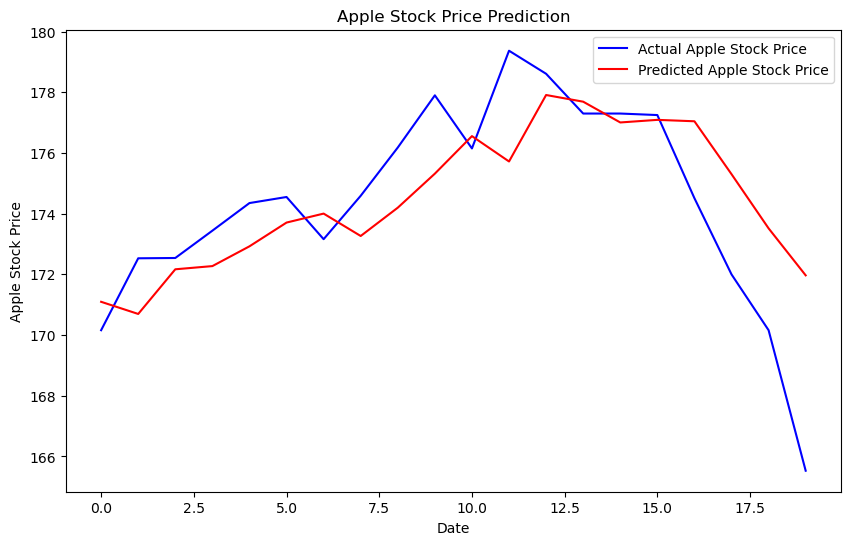

In [71]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()